In [1]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

In [2]:
global_seed = 88
save_results = True
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST_via_avalanche",
                      "difficulty" : "standard",
                      "num_tasks" : 3,
                      "train_percentage" : 0.2,
                      "num_val_benchmarks" : 1,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "EWC",
                   "grow_from" : "output",
                   "hessian_percentile" : 95,
                   "grad_percentile" : 95,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 200,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 1,
                #"lr" : (5e-5, 2e-3),
                "num_epochs" : (2,2),
                "ewc_lambda" : (400,400)
                #"lwf_alpha" : (0.1, 0.9),
                #"lwf_temperature" : (1, 3),
                }

# Parameters specific to the visualization
visualization_settings = {"savefig" : False,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True}

In [3]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib")
sys.path.append("HPO_lib/benchmark_loaders")


path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [4]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation
from HPO_lib.save_and_load_results import save

In [5]:
device = get_device(1)

## Get benchmarks

In [6]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [7]:
test_accs_matrix, best_params_list = run_HPO(HPO_settings, method_settings, benchmark_settings, benchmarks_list[0], device, global_seed)

[I 2024-07-26 14:24:57,164] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-26 14:24:57 +0200
-- >> Start of training phase << --
100%|██████████| 94/94 [00:01<00:00, 63.87it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.7052
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.7894
100%|██████████| 94/94 [00:01<00:00, 73.06it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2082
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9382
-- >> End of training phase << --


[I 2024-07-26 14:25:04,240] Trial 0 finished with value: 93.15413333333328 and parameters: {'num_epochs': 2, 'ewc_lambda': 400}. Best is trial 0 with value: 93.15413333333328.


-- >> Start of training phase << --
100%|██████████| 94/94 [00:01<00:00, 73.31it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.7072
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.7900
100%|██████████| 94/94 [00:01<00:00, 73.01it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2075
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9419
-- >> End of training phase << --


[I 2024-07-26 14:25:09,797] A new study created in memory with name: Search number 2



--------------------------------------------------
LEARNING TASK 2
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-26 14:25:09 +0200
-- >> Start of training phase << --
100%|██████████| 94/94 [00:01<00:00, 69.69it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.6708
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8409
100%|██████████| 94/94 [00:01<00:00, 70.18it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2927
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9365
-- >> End of training phase << --


[I 2024-07-26 14:25:20,018] Trial 0 finished with value: 90.4851333333333 and parameters: {'num_epochs': 2, 'ewc_lambda': 400}. Best is trial 0 with value: 90.4851333333333.


-- >> Start of training phase << --
100%|██████████| 94/94 [00:01<00:00, 69.93it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.6783
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8396
100%|██████████| 94/94 [00:01<00:00, 69.87it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2804
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9406
-- >> End of training phase << --


[I 2024-07-26 14:25:25,703] A new study created in memory with name: Search number 3



--------------------------------------------------
LEARNING TASK 3
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-26 14:25:25 +0200
-- >> Start of training phase << --
100%|██████████| 94/94 [00:01<00:00, 67.09it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.7482
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8516
100%|██████████| 94/94 [00:01<00:00, 66.95it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3802
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9368
-- >> End of training phase << --


[I 2024-07-26 14:25:39,168] Trial 0 finished with value: 88.94434666666668 and parameters: {'num_epochs': 2, 'ewc_lambda': 400}. Best is trial 0 with value: 88.94434666666668.


-- >> Start of training phase << --
100%|██████████| 94/94 [00:01<00:00, 66.72it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.7480
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8485
100%|██████████| 94/94 [00:01<00:00, 66.94it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3853
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9365
-- >> End of training phase << --


## Visualize results

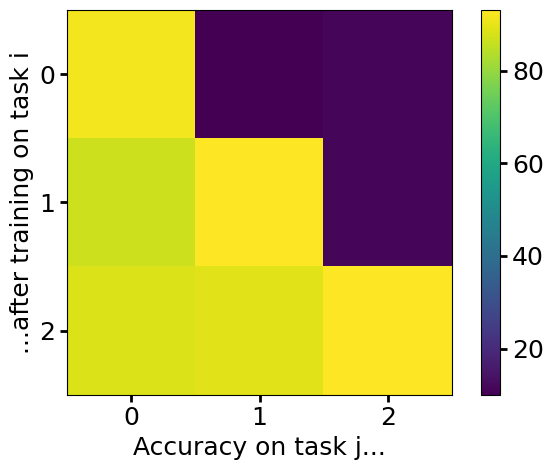

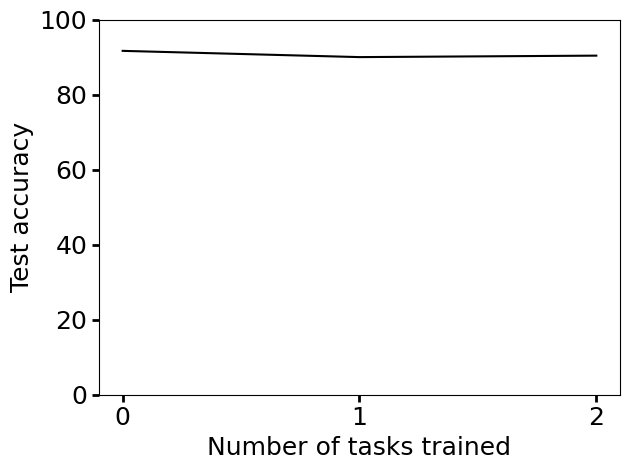

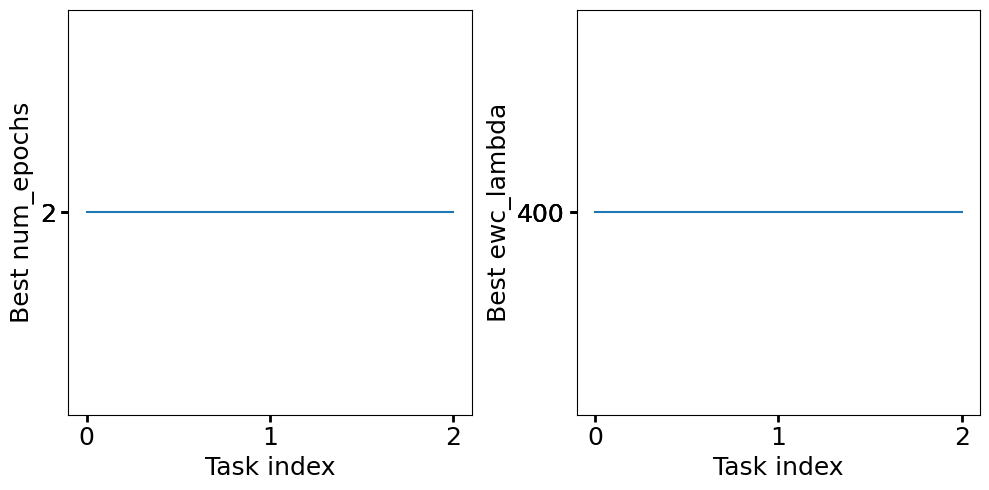

In [8]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [9]:
val_accs_matrix = validate(HPO_settings, benchmarks_list, benchmark_settings, method_settings, best_params_list, device, global_seed)


BENCHMARK 1

--------------------------------------------------
LEARNING TASK 1
-- >> Start of training phase << --
100%|██████████| 94/94 [00:01<00:00, 66.28it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.6932
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.7982
100%|██████████| 94/94 [00:01<00:00, 72.87it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2030
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9413
-- >> End of training phase << --

--------------------------------------------------
LEARNING TASK 2
-- >> Start of training phase << --
100%|██████████| 94/94 [00:01<00:00, 69.84it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.6366
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8436
100%|██████████| 94/94 [00:01<00:00, 69.77it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2731
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9407
-- >> End of training phase << --

----------

## Visualize validation

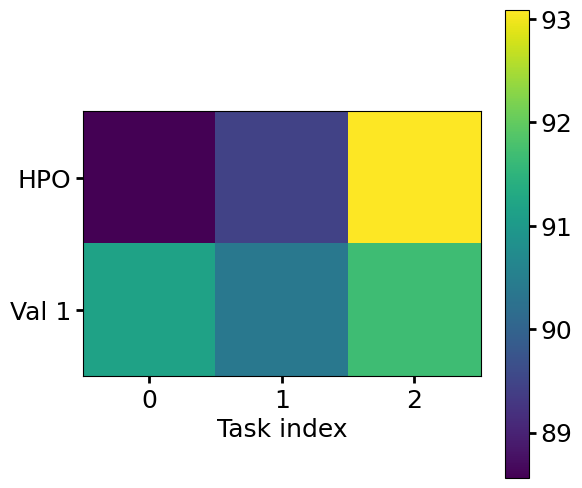

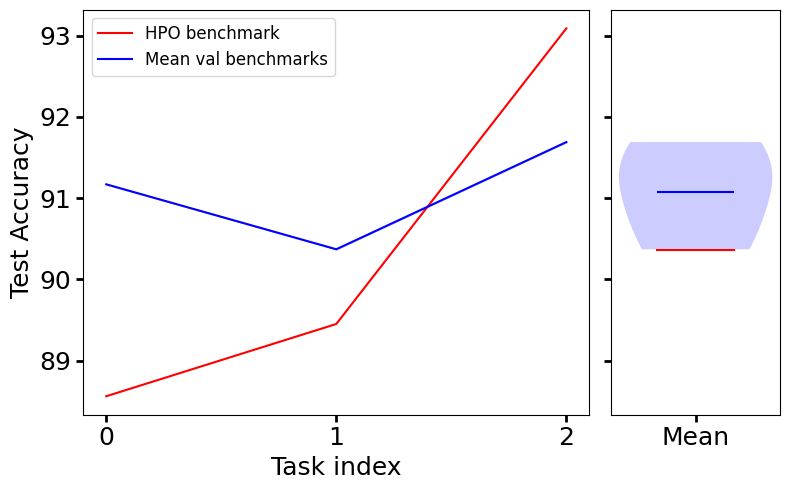

In [10]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [11]:
save(test_accs_matrix, best_params_list, val_accs_matrix, HPO_settings, method_settings, benchmark_settings, save_results)